**Wavefield output code** 
Reserach module in applied geophysics, WS2025 Salome Bachmann

**ToDo**
- imporove visualization so that it is an animation and not seperate plots
- compare pure snow and snow - air - earth model 

**Package Import and Setup of simulation**

In [31]:
# Imports (taken from salvus tutorials)
import os

SALVUS_FLOW_SITE_NAME = os.environ.get("macbook", "local") # Site name given in the installation of Salvus flow
PROJECT_DIR = "simulation_wavefield_output"  
import pathlib
import numpy as np
import salvus.namespace as sn
import xarray as xr
import salvus.namespace as sn
from salvus.project.tools.processing import block_processing
from salvus.toolbox.helpers.wavefield_output import (
    WavefieldOutput,
    wavefield_output_to_xarray,
)
import matplotlib.pyplot as plt
from matplotlib import animation
import obspy

# For wavefield output code
from salvus.mesh.unstructured_mesh_utils import read_model_from_h5
from salvus.toolbox.helpers import wavefield_output




In [12]:


# # Delete previous events if re-running the notebook
# p.events.delete(event_name="")

# # Also delete previous model configurations if re-running the notebook
# path = pathlib.Path(PROJECT_DIR) / "INTERNAL" / "ENTITIES" / "SIMULATION_CONFIGURATIONS"
# for file in path.glob("pure_acoustic_simulation.json"):
#     file.unlink()

**Setpu of homogenous model domain in a box shape**

In [13]:
# Setup of the model domain as a box 
domain_2d = sn.domain.dim2.BoxDomain(x0=0, x1=1, y0=0, y1=1)

# Material parameters are snow (taken from https://tc.copernicus.org/articles/15/5805/2021/ table 2) --> FOR THE HOMOGENPUS CASE 
material_hom = sn.layered_meshing.material.elastic.Velocity.from_params(
    rho=800, vp=300, vs=150
)

mesh_2d_hom = sn.layered_meshing.mesh_from_domain(
    domain=domain_2d,
    model=material_hom,
    mesh_resolution=sn.MeshResolution(
        reference_frequency=10.0, elements_per_wavelength=2.0 
    ),
)

# # plotting mesh to verify model parameters 
# mesh_2d_hom

# Initilaize project from domain 
p = sn.Project.from_domain(path=PROJECT_DIR, domain=domain_2d, load_if_exists=True)

Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

[2026-01-10 17:06:35,849] INFO: Loading project from simulation_wavefield_output.


**Setup of earth-snow-air model**

In [14]:
# # Step 1: Create Layer objects (top/bottom only)
# layers = [
#     sn.layered_meshing.layered_model.Layer(top=0.0, bot=0.33),
#     sn.layered_meshing.layered_model.Layer(top=0.33, bot=0.66),
#     sn.layered_meshing.layered_model.Layer(top=0.66, bot=1.0)
# ]

# # Step 2: Create materials
# materials = [
#     air,
#     snow,
#     earth
# ]

# # Step 3: Pass BOTH to LayeredModel (strata=layers, materials=materials)
# material_layered = sn.layered_meshing.layered_model.LayeredModel(
#     strata=layers,
#     materials=materials
# )


In [15]:
# # Defining material parameters for earth, snow and air
# # Velocity
# snow = sn.layered_meshing.material.elastic.Velocity.from_params(
#     rho=800, vp=300, vs=150
# )

# air = sn.layered_meshing.material.elastic.Velocity.from_params(
#     rho=1.225, vp=343, vs=0
# )

# earth = sn.layered_meshing.material.elastic.Velocity.from_params(
#     rho=2000, vp=1500, vs=800
# )

# # defining top and bottom of layers 
# z0 = 0.0
# z1 = 0.33
# z2 = 0.66
# # z0 = sn.layered_meshing.layered_model.LayerBounds(top=0.0, bot=0.33)
# # z1 = sn.layered_meshing.layered_model.LayerBounds(top=0.33, bot=0.66)
# # z2 = sn.layered_meshing.layered_model.LayerBounds(top=0.66, bot=1.0)


# # defining layeree model 
# strata = [
#     z0, air,
#     z1, snow,
#     z2, earth,

# ]

# for s in strata:
#     print(type(s))

# material_layered = sn.layered_meshing.layered_model.LayeredModel(strata=strata)

In [16]:
# # Model domain is the same as above
# domain_2d = sn.domain.dim2.BoxDomain(x0=0, x1=1, y0=0, y1=1)


# y = np.linspace(0, 1, 100) # Defining y as a linspace 
# x = np.linspace(0, 1, 100)
# xx, yy = np.meshgrid(x, y, indexing="ij")
# # model parameters for thre layers of same size with parameters for earth, snow and air
# rho_layered = np.where(
#     yy < 0.33,
#     2500,  # Earth
#     np.where(yy < 0.66, 800, 1.225),  # Snow, Air
# )
# vp_layered = np.where(
#     yy < 0.33,
#     5000,  # Earth  
#     np.where(yy < 0.66, 3000, 343),  # Snow, Air
# )
# vs_layered = np.where(
#     yy < 0.33,
#     2500,  # Earth
#     np.where(yy < 0.66, 1500, 150),  # Snow, Air
# )

# ds= xr.Dataset(
#     data_vars={
#         "VP": (["x", "y"], vp_layered),
#         "VS": (["x", "y"], vs_layered),
#         "RHO": (["x", "y"], rho_layered),
#     },
#     coords={"x": x, "y": y},
# )


# # # Plotting mesh to check parameters
# ds.VP.T.plot(figsize=(10, 6))


# model_layered = sn.model.volume.cartesian.GenericModel(name="volume", data=ds)
# p.add_to_project(model_layered, overwrite=True)

# p.add_to_project(
#     sn.SimulationConfiguration(
#         name="volumetric_model",
#         max_frequency_in_hertz=30.0,
#         elements_per_wavelength=1.0,
#         tensor_order=1,
#         model_configuration=sn.ModelConfiguration(
#             background_model=sn.model.background.from_volume_model(
#                 model=model_layered
#             ),
#             volume_models=["volume"],
#         ),
#         event_configuration=sn.EventConfiguration(
#             wavelet=sn.simple_config.stf.Ricker(center_frequency=15.0),
#             waveform_simulation_configuration=sn.WaveformSimulationConfiguration(
#                 end_time_in_seconds=0.6
#             ),
#         ),
#     ),
#     overwrite=True,
# )

# p.viz.nb.simulation_setup(
#     simulation_configuration="volumetric_model", events=p.events.list()
# )


**SOurce Setup**


In [17]:
# Soure located at the top of the domain 
src = sn.simple_config.source.cartesian.VectorPoint2D(
    x=0.5,
    y=1.0,
    fx=0.0,
    fy=-1.0,
) # fx and fy values dependend on the type and force of source

p.add_to_project(sn.Event(event_name="event_wavefield_output", sources=[src]))

[2026-01-10 17:06:35,871] INFO: An event with name 'event_wavefield_output' and identical content already exists in the project. Nothing will be done.


**Simulation setup** using an unstructured mesh for both the homogenos and layered model 

In [18]:
p.add_to_project(
    sn.UnstructuredMeshSimulationConfiguration(
        name="sim_2d_hom",
        unstructured_mesh=mesh_2d_hom,
        event_configuration=sn.EventConfiguration(
            wavelet=sn.simple_config.stf.Ricker(center_frequency=2.5),
            waveform_simulation_configuration=sn.WaveformSimulationConfiguration(
                end_time_in_seconds=2.0
            ),
        ),
    ),
)
#p.viz.nb.simulation_setup("sim_2d_hom", events=["event_wavefield_output"])

# p.add_to_project(
#     sn.UnstructuredMeshSimulationConfiguration(
#         name="sim_2d_layered",
#         unstructured_mesh=model_layered,
#         event_configuration=sn.EventConfiguration(
#         wavelet=sn.simple_config.stf.Ricker(center_frequency=2.5),
#         waveform_simulation_configuration=sn.WaveformSimulationConfiguration(
#             end_time_in_seconds=2.0
#             ),
#         ),
#     ),
# )
# p.viz.nb.simulation_setup("sim_2d_hom", events=["event_wavefield_output"])

[2026-01-10 17:06:35,892] INFO: This exact entity is already part of the project. Nothing will be done. The comparison to the existing mesh was fairly expensive as it is (depending on the mesh size) a large amount of data that has to be compared. So best only add it once!


**Launching simularions**

In [20]:
# Launching simulations 
# Homogenous
p.simulations.launch(
    simulation_configuration="sim_2d_hom",
    events=p.events.list(),
    site_name="macbook", 
    ranks_per_job=1,
    extra_output_configuration={
        "volume_data": {
            "sampling_interval_in_time_steps": 10,
            "fields": ["velocity"],
        },
    },
)
p.simulations.query(block=True)

# Layered

[2026-01-10 17:07:50,296] INFO: Submitting job ...
Uploading 1 files...

🚀  Submitted job_2601101707371294_2c0f7db0ab@macbook


VBox()

True

**Wavefield output** at one point in time

Finding enclosing elements (pass 1 of auto):   0%|          | 0/10201 [00:00<?, ?it/s]

Extracting wavefield to regular grid:   0%|          | 0/1 [00:00<?, ?it/s]

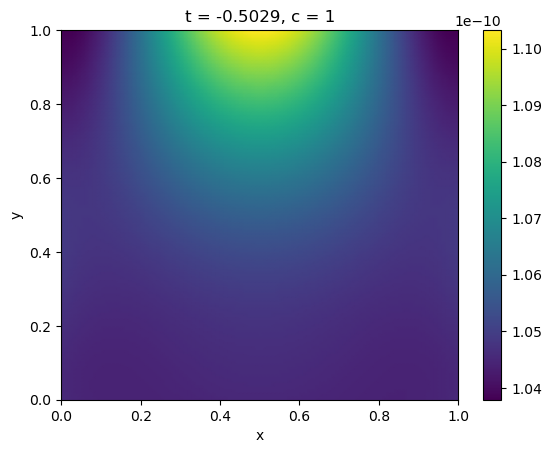

In [38]:
out_2d = p.simulations.get_simulation_output_directory("sim_2d_hom", "event_wavefield_output")

vel_wo = wavefield_output.WavefieldOutput.from_file(
    pathlib.Path(
        out_2d,
        "volume_data_output.h5",
    ),
    "velocity",
    "volume",
)

# Converting to an x array
vel_2d = wavefield_output.wavefield_output_to_xarray(
    vel_wo,
    points=[np.linspace(0, 1, 101), np.linspace(0, 1, 101)],
)

# Plotting wavefield output
# T is the timeslice (the t'th output image)
vel_2d.isel(c=1, t=35).T.plot(shading="gouraud", infer_intervals=False)

**Animating wavefield propagation over all steps in time**

In [49]:
# Same as above 
out_2d = p.simulations.get_simulation_output_directory("sim_2d_hom", "event_wavefield_output")

vel_wo = wavefield_output.WavefieldOutput.from_file(
    pathlib.Path(
        out_2d,
        "volume_data_output.h5",
    ),
    "velocity",
    "volume",
)

# Converting to an x array
vel_2d = wavefield_output.wavefield_output_to_xarray(
    vel_wo,
    points=[np.linspace(0, 1, 101), np.linspace(0, 1, 101)],
)

# Plorring all timesteps in an animation

def update_frame():
    for i in range(vel_2d.sizes["t"]):
        vel_2d.isel(c=1, t=i).T.plot(shading="gouraud", infer_intervals=False)
        plt.pause(0.1)
    return update_frame



# for i in range(vel_2d.sizes["t"]):
#     vel_2d.isel(c=1, t=i).T.plot(shading="gouraud", infer_intervals=False)
#     plt.pause(0.1)






Finding enclosing elements (pass 1 of auto):   0%|          | 0/10201 [00:00<?, ?it/s]

Extracting wavefield to regular grid:   0%|          | 0/1 [00:00<?, ?it/s]